In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 22 11:13:14 2018

@author: lequang
"""

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



def infection_model(network, p, flights, start_node):

    #Extract data of first flight and last flight 
    start_time = flights.StartTime.min() #First infected time
    end_time = flights.EndTime.max()
    flights = flights.sort_values("StartTime")

    #Create dataframe storing airport and infection time 
    airports = sorted(network.nodes())
    inf_time = np.full((len(airports),), np.inf)
    infection = pd.DataFrame({"Airport":airports, "InfectionTime": inf_time}) 
    
    #Set the infection time of first infected node:
    infection.InfectionTime[start_node] = start_time
    #Loop over flights and start infection 
    for i in range(len(flights)):
        source = flights.Source[i]
        source_inf_time = infection.InfectionTime[source]
        if (source_inf_time < flights.StartTime[i]):
            random = np.random.rand()
            if random <= p:
                target = flights.Destination[i]
                target_cur_inf_time = infection.InfectionTime[target]
                target_new_inf_time = flights.EndTime[i]
                if target_new_inf_time < target_cur_inf_time:
                    infection.InfectionTime[target] = target_new_inf_time
    return infection , start_time, end_time


flights = pd.read_csv("./events_US_air_traffic_GMT.txt", sep = " ")


#Read in network data
networkpath = "./aggregated_US_air_traffic_network_undir.edg"
network = nx.read_weighted_edgelist(networkpath, nodetype = int )

#Run model with p = 1
start_node = flights.Source[0] #Initiate the first infected node
infection,_,_ = infection_model(network, 1 ,flights, start_node)
infection_times = infection.InfectionTime

print("Anchorage infection time: ",infection.InfectionTime[41])




/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Anchorage infection time:  1229290800.0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

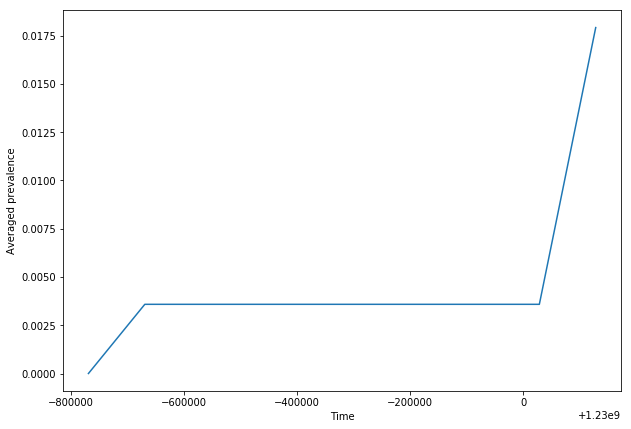

In [28]:
#Task 2: Effect of probability p on spreading speed
def averaged_prevalence_visualization(no_iter, infection, start, end, p, label):
    t = np.linspace(start, end, no_iter)
    p_t = []
    for k in range(0,no_iter):
        count = (infection.InfectionTime < t[k]).sum()
        prob = count/len(infection)
        p_t.append(prob)
    plt.plot(t, p_t, label = label)
    plt.xlabel("Time")
    plt.ylabel("Averaged prevalence") 

fig = plt.figure(figsize=(10,7))
for p in (0.01,0.05, 0.1, 0.5, 1):
    infection_p, start, end = infection_model(network, p,flights, start_node)
    averaged_prevalence_visualization(10, infection_p, start, end, p,p)
plt.legend()
plt.show()
 
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


KeyboardInterrupt: 

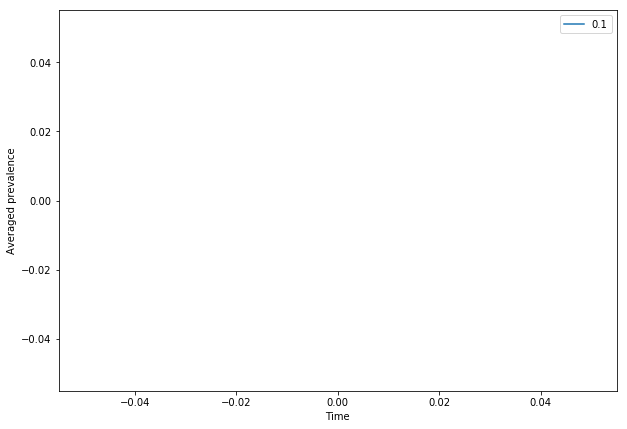

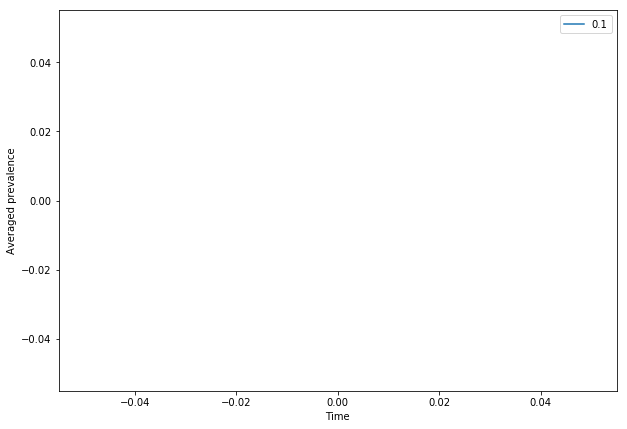

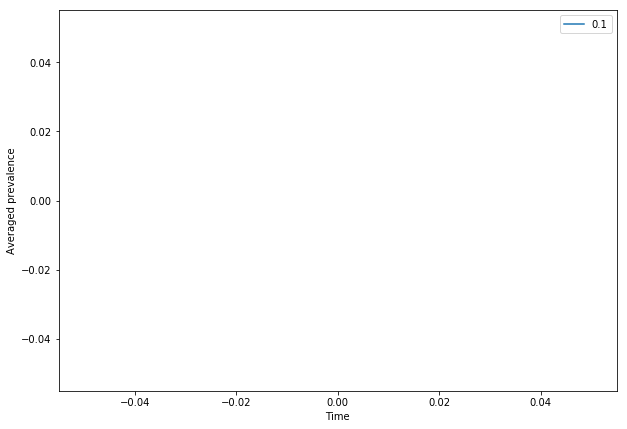

In [22]:
node_id = [0,4,41,100,200]
p = 0.1
for node in node_id:
    for i in range(0,10):
        infection_node, start, end = infection_model(network, p, flights, node)
        averaged_prevalence_visualization(1, infection_node, start, end, p, node)
    plt.show()
    plt.title('Average prevalence model with seed {}'.format(node))

